# 3. Modelling and Evaluation

## Overview
---
This section will determine the prediction model to be used for Kaggle Submission. Two versions of cleaned datasets for modelling has been produced with different degrees of feature engineering. <br/>
#### Version 0 
Description: 
- Mapping ordinal variables 
- One Hot Encoding categorical variables <br/>

Exported data: 
- kaggle_subm_v0.csv 

#### Version 1 
Description: 
- Mapping ordinal variables
- One Hot Encoding categorical variables
- Reducing multicollinearity
- Mapping `Neighborhood` as ordinal variable <br/>

Exported data: 
- kaggle_subm_v1.csv

### This notebook will be exporting two datasets for submission on Kaggle.

## Importing Libraries
---

In [85]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
# allows us to see all rows and columns 
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
# limit floats to 3 decimal points

import numpy as np

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

In [2]:
# defining function for checking df shapes
def df_shape(df1, df2):
    print(df1.shape)
    print(df2.shape)

## Load the Data
---
### For Version 0

In [3]:
df_train_v0 = pd.read_csv('../data/train_model_v0.csv')
df_train_v0.head()

,id,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_160,ms_subclass_180,ms_subclass_190,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Norm,condition_2_PosA,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,109,68.879,13517,3,4,3,6,8,1976,2005,289.000,4,3,3,3,1,6,533.000,1,0.000,192.000,725.000,5,1,5,725,754,0,1479,0.000,0.000,2,1,3,1,4,6,8,0,1976.000,2,2.000,475.000,3,3,3,0,44,0,0,0,0,0,3,2010,130500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,544,43.000,11492,3,4,3,7,5,1996,1997,132.000,4,3,4,3,1,6,637.000,1,0.000,276.000,913.000,5,1,5,913,1209,0,2122,1.000,0.000,2,1,4,1,4,8,8,1,1997.000,2,2.000,559.000,3,3,3,0,74,0,0,0,0,0,4,2009,220000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,153,68.000,7922,4,4,3,5,7,1953,2007,0.000,3,4,3,3,1,6,731.000,1,0.000,326.000,1057.000,3,1,5,1057,0,0,1057,1.000,0.000,1,0,3,1,4,5,8,0,1953.000,1,1.000,246.00

In [4]:
df_train_v0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Columns: 180 entries, id to sale_type_WD 
dtypes: float64(11), int64(169)
memory usage: 2.8 MB


In [5]:
df_test_v0 = pd.read_csv('../data/test_model_v0.csv')
df_test_v0.head()

,id,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_160,ms_subclass_180,ms_subclass_190,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Norm,condition_2_PosA,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,2658,69.000,9142,4,4,3,6,8,1910,1950,0.000,3,2,2,3,1,1,0,1,0,1020,1020,4,0,2,908,1020,0,1928,0,0,2,0,4,2,2,9,8,0,1910.000,1,1,440,1,1,3,0,60,112,0,0,0,0,4,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,2718,69.546,9662,3,4,3,5,4,1977,1977,0.000,3,3,4,3,1,1,0,1,0,1967,1967,3,1,5,1967,0,0,1967,0,0,2,0,6,2,3,10,8,0,1977.000,3,2,580,3,3,3,170,0,0,0,0,0,0,8,2006,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,2414,58.000,17104,3,4,3,7,5,2006,2006,0.000,4,3,4,4,3,6,554,1,0,100,654,5,1,5,664,832,0,1496,1,0,2,1,3,1,4,7,8,1,2006.000,2,2,426,3,3,3,100,24,0,0,0,0,0,9,2006,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

In [6]:
df_test_v0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Columns: 179 entries, id to sale_type_WD 
dtypes: float64(3), int64(176)
memory usage: 1.2 MB


### For Version 1

In [7]:
df_train_v1 = pd.read_csv('../data/train_model_v1.csv')
df_train_v1.head()

,id,lot_frontage,lot_area,lot_shape,utilities,land_slope,neighborhood,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,misc_val,mo_sold,yr_sold,saleprice_log,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_160,ms_subclass_180,ms_subclass_190,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Norm,condition_2_PosA,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,109,68.879,13517,3,4,3,2,6,8,1976,2005,289.000,4,3,3,3,1,6,533.000,1,725.000,5,1,5,725,1479,0.000,0.000,2,1,3,1,4,6,8,0,1976.000,2,2.000,475.000,3,3,3,0,44,0,3,2010,11.779,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,544,43.000,11492,3,4,3,2,7,5,1996,1997,132.000,4,3,4,3,1,6,637.000,1,913.000,5,1,5,913,2122,1.000,0.000,2,1,4,1,4,8,8,1,1997.000,2,2.000,559.000,3,3,3,0,74,0,4,2009,12.301,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,153,68.000,7922,4,4,3,2,5,7,1953,2007,0.000,3,4,3,3,1,6,731.000,1,1057.000,3,1,5,1057,1057,1.000,0.000,1,0,3,1,4,5,8,0,1953.000,1,1.000,246.000,3,3,3,0,52,0,1,2010,11.599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,318,73.000,9802,4,4,3,4,5,5,2006,2007,0.000,3,3,4,3,1,1,0.000,1,384.000,4,1,5,744,1444,0.000,0.000,2,1,3,1,3,7,8,0,2007.000,3,2.000,400.000,3,3,3,100,0,0,4,2010,12.067,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,255,82.000,14235,3,4,3,2,6,8,1900,1993,0.000,3,3,2,4,1,1,0.000,1,676.000,3,1,5,831,1445,0.000,0.000,2,0,3,1,3,6,8,0,1957.000,1,2.000,484.000,3,3,1,0,59,0,3,2010,11.839,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,

In [8]:
df_train_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Columns: 147 entries, id to sale_type_WD 
dtypes: float64(10), int64(137)
memory usage: 2.3 MB


In [9]:
df_test_v1 = pd.read_csv('../data/test_model_v1.csv')
df_test_v1.head()

,id,lot_frontage,lot_area,lot_shape,utilities,land_slope,neighborhood,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,misc_val,mo_sold,yr_sold,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_160,ms_subclass_180,ms_subclass_190,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Norm,condition_2_PosA,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,2658,69.000,9142,4,4,3,1,6,8,1910,1950,0.000,3,2,2,3,1,1,0,1,1020,4,0,2,908,1928,0,0,2,0,4,2,2,9,8,0,1910.000,1,1,440,1,1,3,0,60,0,4,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,2718,69.546,9662,3,4,3,2,5,4,1977,1977,0.000,3,3,4,3,1,1,0,1,1967,3,1,5,1967,1967,0,0,2,0,6,2,3,10,8,0,1977.000,3,2,580,3,3,3,170,0,0,8,2006,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,2414,58.000,17104,3,4,3,3,7,5,2006,2006,0.000,4,3,4,4,3,6,554,1,654,5,1,5,664,1496,1,0,2,1,3,1,4,7,8,1,2006.000,2,2,426,3,3,3,100,24,0,9,2006,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,1989,60.000,8520,4,4,3,1,5,6,1923,2006,0.000,4,3,3,3,1,1,0,1,968,3,1,5,968,968,0,0,1,0,2,1,3,5,8,0,1935.000,1,2,480,2,3,1,0,0,0,7,2007,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,625,69.546,9500,3,4,3,2,6,5,1963,1963,247.000,3,3,4,3,1,4,609,1,1394,4,1,5,1394,1394,1,0,1,1,3,1,3,6,8,2,1963.000,2,2,514,3,3,3,0,76,0,7,2009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [10]:
df_test_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Columns: 146 entries, id to sale_type_WD 
dtypes: float64(3), int64(143)
memory usage: 1001.6 KB


In [11]:
# defining function for checking df shapes
def df_shape(df1, df2):
    print(df1.shape)
    print(df2.shape)
    
df_shape(df_train_v0, df_test_v0)

(2049, 180)
(878, 179)


In [12]:
df_shape(df_train_v1, df_test_v1)

(2049, 147)
(878, 146)


## Model Prep 
---
### For Version 0 - Training Set

#### 1. Creating features matrix (`X`) and target vector (`y`)

Every numerical column (that is not the target) will be used as a feature. <br/>
The `SalePrice` column is our target vector.

In [13]:
features_v0 = [col for col in df_train_v0._get_numeric_data().columns if col != 'saleprice']
X_v0 = df_train_v0[features_v0]
y_v0 = df_train_v0['saleprice']

#### 2. Train Test Split

In [14]:
# splitting only the training dataset into training and testing
X_train_v0, X_test_v0, y_train_v0, y_test_v0 = train_test_split(X_v0, y_v0, random_state=42)

#### 3. Scaling

In [15]:
ss = StandardScaler()
ss.fit(X_train_v0)
X_train_v0 = ss.transform(X_train_v0)
X_test_v0 = ss.transform(X_test_v0)

#### 4. Instantiate the Models

In [16]:
lr = LinearRegression()
lasso = LassoCV(n_alphas=200)
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

#### 5. Cross Validation
We will be using $R^2$ value to evaluate across the three linear models.<br/>
Interpretation: "An $R^2$ value of 0.9 means that 0% of the variability in _y_ is explained by the _x_-variables in our model."<br/>

In [17]:
lr_scores_v0 = cross_val_score(lr, X_train_v0, y_train_v0, cv=5)
lr_scores_v0.mean()
# why is this value so highly negative?

-2.538809711482103e+22

In [18]:
lasso_scores_v0 = cross_val_score(lasso, X_train_v0, y_train_v0, cv=5)
lasso_scores_v0.mean()

0.9031039579552486

In [19]:
ridge_scores_v0 = cross_val_score(ridge, X_train_v0, y_train_v0, cv=5)
ridge_scores_v0.mean()

0.8978529935141463

As the lasso model has the highest $R^2$ value, it will be used as the predicting model.

### For Version 1

#### 1. Creating features matrix (`X`) and target vector (`y`)

Every numerical column (that is not the target) will be used as a feature. <br/>
The `saleprice_log` column is our target vector.

In [20]:
features_v1 = [col for col in df_train_v1._get_numeric_data().columns if col != 'saleprice_log']
X_v1 = df_train_v1[features_v1]
y_v1 = df_train_v1['saleprice_log']

#### 2. Train Test Split

In [21]:
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(X_v1, y_v1, random_state=42)

#### 3. Scaling

In [22]:
ss = StandardScaler()
ss.fit(X_train_v1)
X_train_v1 = ss.transform(X_train_v1)
X_test_v1 = ss.transform(X_test_v1)

#### 4. Instantiate the Models

In [23]:
lr = LinearRegression()
lasso = LassoCV(n_alphas=200)
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

#### 5. Cross Validation
We will be using $R^2$ value to evaluate across the three linear models.<br/>
Interpretation: "An $R^2$ value of 0.9 means that 0% of the variability in _y_ is explained by the _x_-variables in our model."<br/>

In [24]:
lr_scores_v1 = cross_val_score(lr, X_train_v1, y_train_v1, cv=5)
lr_scores_v1.mean()

-7.523095453279445e+18

In [25]:
lasso_scores_v1 = cross_val_score(lasso, X_train_v1, y_train_v1, cv=5)
lasso_scores_v1.mean()

0.9171813120518062

In [26]:
ridge_scores_v1 = cross_val_score(ridge, X_train_v1, y_train_v1, cv=5)
ridge_scores_v1.mean()

0.9089724637912131

Similar to Version 0, as the lasso model has the highest $R^2$ value, it will be used as the predicting model.

## Model Fitting and Applying to Kaggle Test dataset
---
### Model Fitting for Version 0
Since the lasso model has the highest $R^2$ value, it will be used as the prediction model.

In [27]:
lasso.fit(X_train_v0, y_train_v0)

LassoCV(n_alphas=200)

In [28]:
#train score
lasso.score(X_train_v0, y_train_v0)

0.9227072066050835

In [29]:
#test score
lasso.score(X_test_v0, y_test_v0)

0.9151007147377352

In [30]:
pred_v0 = lasso.predict(X_test_v0)
r2_score(y_test_v0, pred_v0)

0.9151007147377352

In [31]:
print("For Version 0")
print(f'Train R2 value = {lasso.score(X_train_v0, y_train_v0)}')
print(f'Test R2 value = {lasso.score(X_test_v0, y_test_v0)}')
print(f'Cross Val R2 value = {lasso_scores_v0.mean()}')

For Version 0
Train R2 value = 0.9227072066050835
Test R2 value = 0.9151007147377352
Cross Val R2 value = 0.9031039579552486


As the $R^2$ value for train set is higher than both, it may indicate an overfitting of the model. 

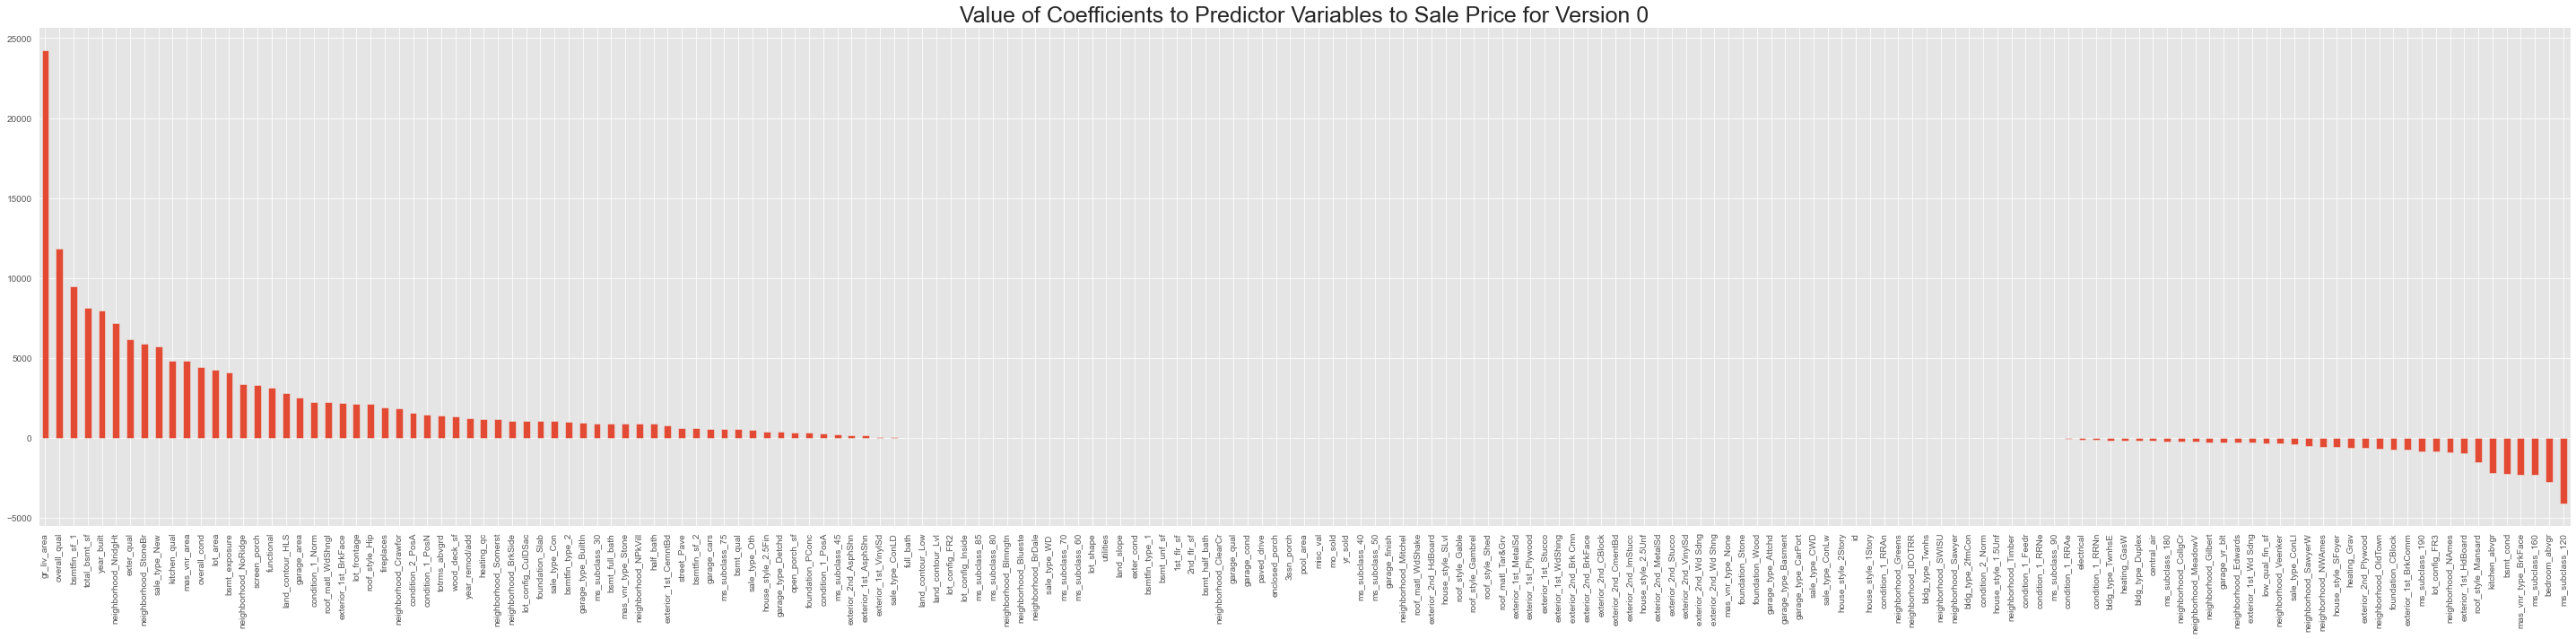

In [32]:
pd.Series(lasso.coef_, index=features_v0).sort_values(ascending=False).plot.bar(figsize=(40, 10))
plt.title(label = 'Value of Coefficients to Predictor Variables to Sale Price for Version 0', fontsize = 25)
plt.tight_layout()
plt.savefig('../images/coeff_barplot_trainv0.png', transparent = True);

In [83]:
pd.DataFrame(set(zip(features_v1, lasso.coef_))).sort_values(by=[1], ascending=False)

,0,1
143,gr_liv_area,0.125
13,overall_qual,0.087
26,year_built,0.034
27,overall_cond,0.034
34,neighborhood,0.034
76,total_bsmt_sf,0.033
75,bsmtfin_sf_1,0.033
128,functional,0.028
108,lot_area,0.024
55,fireplaces,0.020


The top features that can add value to a property are as shown above. 

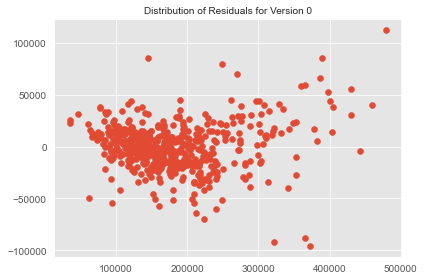

In [33]:
residuals_v0 = y_test_v0 - pred_v0
plt.scatter(pred_v0, residuals_v0)
plt.title(label = 'Distribution of Residuals for Version 0', fontsize = 10)
plt.tight_layout()
plt.savefig('../images/pred_resid_scatterplot_trainv0.png', transparent = True);

The residuals for version 0 shows close to a normal distribution for the residuals with a spread of about 50,000 (`SalePrice`) about the mean and a number of outliers (maybe about 4?).

### Model Fitting for Version 1
Since the lasso model has the highest $R^2$ value, it will be used as the prediction model.

In [39]:
lasso.fit(X_train_v1, y_train_v1)

LassoCV(n_alphas=200)

In [40]:
lasso.score(X_train_v1, y_train_v1)

0.9260955088749344

In [41]:
lasso.score(X_test_v1, y_test_v1)

0.8968348835889

In [42]:
pred_v1 = lasso.predict(X_test_v1)
r2_score(y_test_v1, pred_v1)

0.8968348835889

In [43]:
print("For Version 1")
print(f'Train R2 value = {lasso.score(X_train_v1, y_train_v1)}')
print(f'Test R2 value = {lasso.score(X_test_v1, y_test_v1)}')
print(f'Cross Val R2 value = {lasso_scores_v1.mean()}')

For Version 1
Train R2 value = 0.9260955088749344
Test R2 value = 0.8968348835889
Cross Val R2 value = 0.9171813120518062


SImilarly, the $R^2$ value for train set is higher than both, it may indicate an overfitting of the model. However, the difference in the $R^2$ values in Version 1 is smaller than that in Version 0, meaning that the model is generally a better fit.

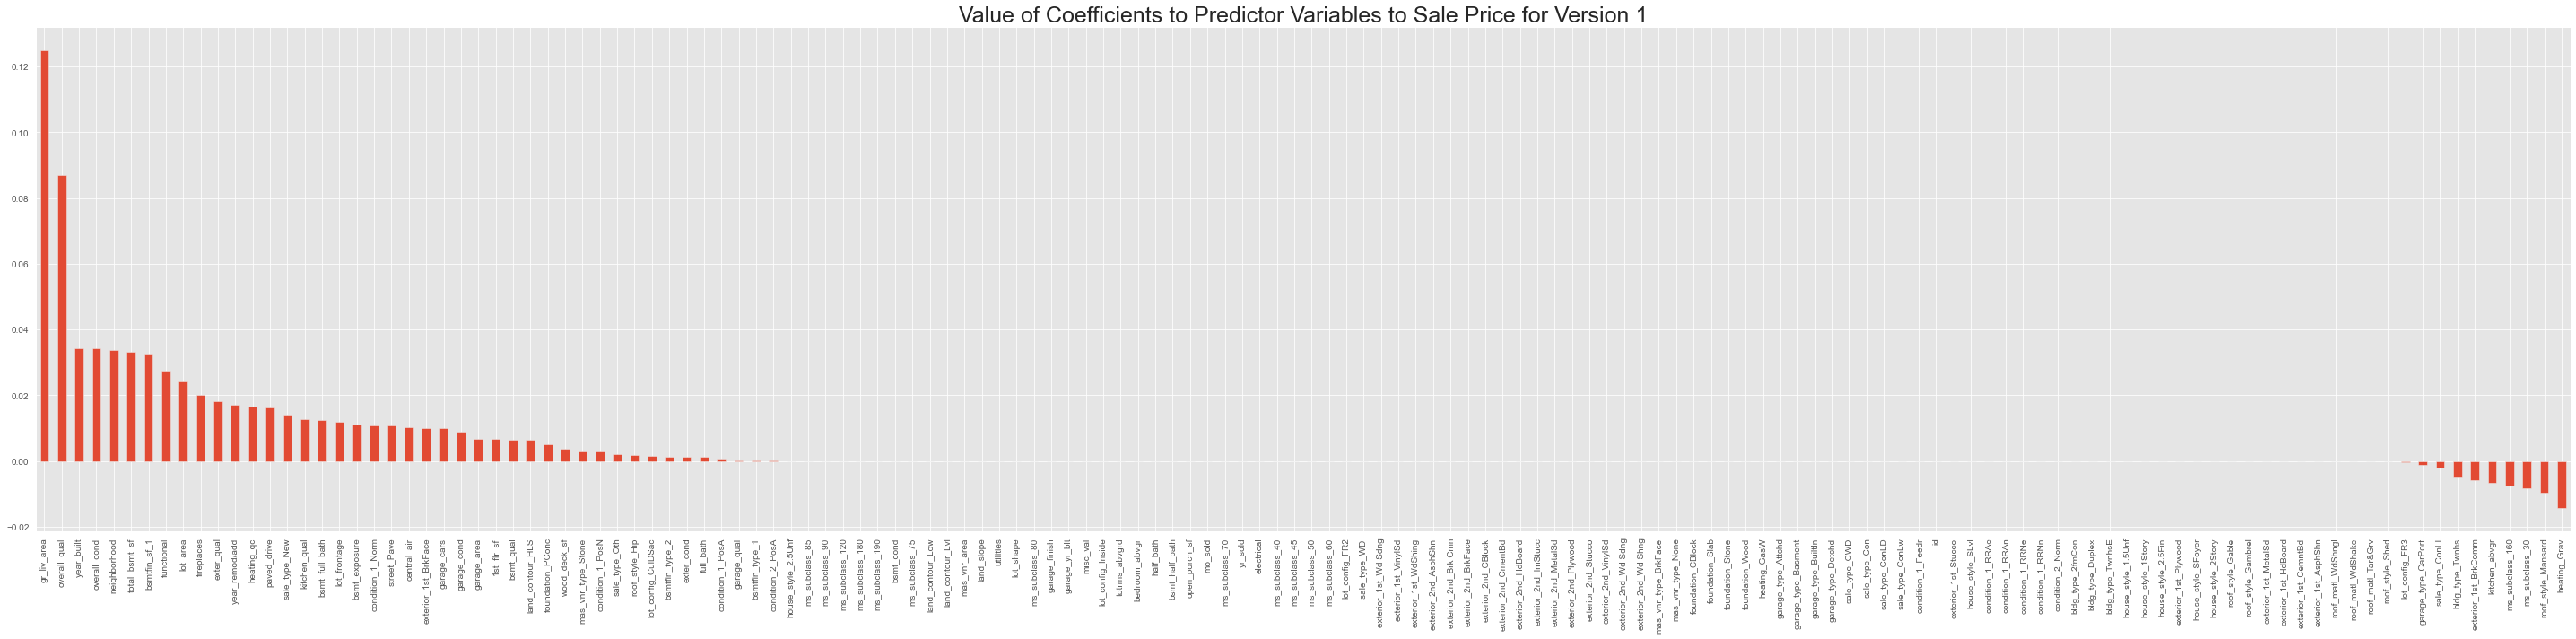

In [44]:
pd.Series(lasso.coef_, index=features_v1).sort_values(ascending=False).plot.bar(figsize=(40, 10))
plt.title(label = 'Value of Coefficients to Predictor Variables to Sale Price for Version 1', fontsize = 25)
plt.tight_layout()
plt.savefig('../images/coeff_barplot_trainv1.png', transparent = True);

In [82]:
pd.DataFrame(set(zip(features_v1, lasso.coef_))).sort_values(by=[1], ascending=False)

,0,1
143,gr_liv_area,0.125
13,overall_qual,0.087
26,year_built,0.034
27,overall_cond,0.034
34,neighborhood,0.034
76,total_bsmt_sf,0.033
75,bsmtfin_sf_1,0.033
128,functional,0.028
108,lot_area,0.024
55,fireplaces,0.020


The top features that can add value to a property are as shown above. 

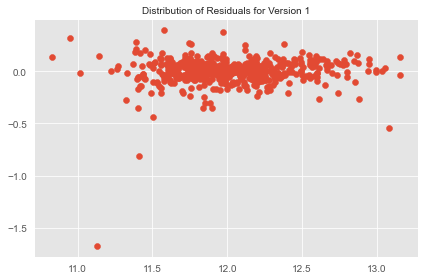

In [45]:
residuals_v1 = y_test_v1 - pred_v1
plt.scatter(pred_v1, residuals_v1)
plt.title(label = 'Distribution of Residuals for Version 1', fontsize = 10)
plt.tight_layout()
plt.savefig('../images/pred_resid_scatterplot_trainv1.png', transparent = True);

The residuals for version 1 shows a smaller spread of about less than 0.5 (log transformation of `SalePrice`) about the mean and while there seems to be lesser outliers, they vary more highly compared to version 0.

### Applying to Kaggle Test dataset for Version 0

In [34]:
df_test_v0.shape

(878, 179)

In [35]:
# transforming test set to be same scale as training
ss = StandardScaler()
ss.fit(df_test_v0)
df_test_v0 = ss.transform(df_test_v0)

In [36]:
# predicting saleprice for test set using training model
prediction_v0 = lasso.predict(df_test_v0)

In [37]:
# putting predictions into dataframe
prediction_v0 = pd.DataFrame(prediction_v0)
prediction_v0.head()

,0
0,135439.014
1,158487.502
2,224471.479
3,116237.284
4,176626.106


In [38]:
# changing column header
prediction_v0.columns = ['SalePrice']
prediction_v0.head()

,SalePrice
0,135439.014
1,158487.502
2,224471.479
3,116237.284
4,176626.106


### Applying to Kaggle Test dataset for Version 1

In [46]:
df_test_v1.shape

(878, 146)

In [47]:
# transforming test set to be same scale as training
ss = StandardScaler()
ss.fit(df_test_v1)
df_test_v1 = ss.transform(df_test_v1)

In [48]:
# predicting saleprice_log for test set using training model
prediction_v1 = lasso.predict(df_test_v1)

In [49]:
# putting predictions into dataframe
prediction_v1 = pd.DataFrame(prediction_v1)
prediction_v1.head()

,0
0,11.829
1,11.992
2,12.291
3,11.575
4,12.028


In [50]:
def exponential(x):
    return np.exp(x)

prediction_v1 = prediction_v1.apply(exponential)

In [51]:
prediction_v1.columns = ['SalePrice']
prediction_v1.head()

,SalePrice
0,137203.045
1,161530.266
2,217687.832
3,106407.855
4,167354.218


## Formatting Kaggle Test dataset for submission
---

In [52]:
df_shape(prediction_v0, prediction_v0)

(878, 1)
(878, 1)


In [53]:
# reading csv for test set to obtain Id values
df_test = pd.read_csv('../data/test.csv')
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.000,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.000,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.000,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,nan,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.000,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.000,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.000,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.000,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.000,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.000,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.000,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.000,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,nan,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.000,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.000,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [54]:
# extracting Id values from test set
df_test_Id = pd.DataFrame(df_test['Id'])
df_test_Id.head()

,Id
0,2658
1,2718
2,2414
3,1989
4,625


In [55]:
kaggle_subm_v0 = df_test_Id.join(prediction_v0)
kaggle_subm_v0.head()

,Id,SalePrice
0,2658,135439.014
1,2718,158487.502
2,2414,224471.479
3,1989,116237.284
4,625,176626.106


In [56]:
kaggle_subm_v1 = df_test_Id.join(prediction_v1)
kaggle_subm_v1.head()

,Id,SalePrice
0,2658,137203.045
1,2718,161530.266
2,2414,217687.832
3,1989,106407.855
4,625,167354.218


In [57]:
kaggle_subm_v0.to_csv('../data/kaggle_subm_v0.csv', index=False)

In [58]:
kaggle_subm_v1.to_csv('../data/kaggle_subm_v1.csv', index=False)

## Conclusions
---

#### A) The top ten characteristics that will increase the value of a property -   
1. Above Grade Living Area
2. Overall Quality - based on material and finish of the house
3. Year Built - based on original construction date
4. Overall Condition 
5. Neighborhood
6. Total Basement Area
7. Functionality
8. Lot Area
9. Having at least one fireplace
10. Exterior Quality

#### B) Renovations that home owners can consider doing to increase the value of their properties -  
1. Add a fireplace (If there were none before)
2. Repainting or minor facelift to the external of the property
3. Renovations to the kitchen

#### C) Usage of Prediction Model -
1. Upon submission to the [Kaggle Challenge](https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge/leaderboard), with the scoring based on RMSE, the lasso model yielded scores as seen below -
||Description|Private Score|Public Score|
|---|---|---|---|
|Version 0|Minimal Cleaning|22409.988|26862.796|
|Version 1|Feature Engineering|20580.002|21762.282|
2. While the Kaggle challenge uses RMSE as the scoring system, it is not very interpretable as it depends on the scale of the target variable, which in this case it's sale price.
3. In this case of the RMSE being at about 20,000 - it means that the average difference from the actual sale price is about USD20,000 which is significant considering that the mean sale price is about USD180,000. Model still requires much fine-tuning before it can reach a production level algorithm.
3. Instead, we used $R^2$ value to select a linear regression model for this project. Having a $R^2$ value of 0.917 means that 91.7% of the variability in _y_ is explained by the _x_-variables in our model.

## Future Development
---
### 1. Cleaning and EDA

Since this project serves as an exercise only, all the features were largely retained although they showed little to no correlation to the sale price. If this model were to be used for real life application, the features will have to be reduced to a reasonable amount such that data can be easily collected. <br/>
<br/>
Missing values for `Lot Frontage` was imputed with the mean value of the entire dataset. This could be improved by being more specific about the mean value being imputed, such as taking into consideration the neighborhood that the property is in, and taking the mean value of that particular neighborhood to be imputed instead.

### 2. Feature Engineering

More features can be considered and mapped as ordinal variables rather than one hot encoding them as categorical variables, similar to that done for `Neighborhood` in version 1. Those features could be `Foundation`, `Roof Material`, `Masonry Veneer Type`, `Exterior 1` as they describe the building materials, and those materials can be graded by their quality.

### 3. Modelling

While $R^2$ value serves as an easily interpretable value, there may be too many variables in this dataset resulting it in being inaccurate for model selection as $R^2$ will never decrease as you start adding more variables. Hence, an alternative assessment could be to use Adjusted $R^2$ as the scoring system for the models instead. The current $R^2$ value of 0.917 for a model to be applicable in real life sounds too good to be true!